In [1]:
#
# regridding HEALPix data to 1x1 degree
# see https://easy.gems.dkrz.de/Processing/healpix/regridding.html
#
%config InlineBackend.print_figure_kwargs = {"dpi": 72}
import healpy as hp
import xarray as xr
import numpy as np
import intake

# for online
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
# for nowake
#cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["JAPAN"]
zd = cat.nicam_gl11(time="PT3H", zoom=5).to_dask()


/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


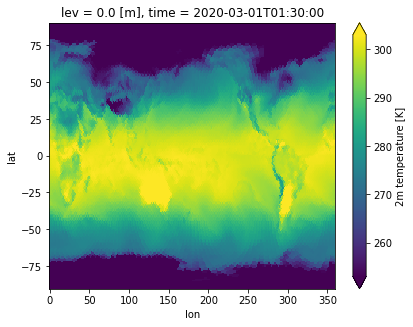

In [2]:
lon = np.arange(0, 360, 1)
lat = np.arange(90, -91, -1)

# array of HEALPix cells which are closes to the 1x1 degree grid points
pix = xr.DataArray(
    hp.ang2pix(
        zd.healpix.healpix_nside, 
        *np.meshgrid(lon, lat), 
        nest=zd.healpix.healpix_order=="nested", 
        lonlat=True),
    coords=(("lat", lat), ("lon", lon)),
)

zd.tas.isel(cell=pix).isel(time=0).plot(
    vmin=253, vmax=303
)